In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{lmodern}'  # Usar Latin Modern Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Latin Modern Roman']
import numpy as np
from tensorflow import keras
#sns.set_style('dark')
plt.rcParams['font.size'] = 16
import json
import os
import copy
from IPython.display import display, HTML

# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score

import scipy as sp
from scipy.optimize import curve_fit

import uproot
import awkward as ak

import awkward as ak
import matplotlib.pyplot as plt
import hist
import math
import numpy as np
import vector
import pylhe
import seaborn as sns
from matplotlib import colormaps

In [2]:
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.



In [3]:
%pip install latex

Note: you may need to restart the kernel to use updated packages.


In [4]:
os.getcwd()

'/Users/esser/Documents/PROJECTS/ALPsPheno/ALP GLOBAL/github/notebooks'

# Signal events

## Read in the data

In [5]:
fileg = "../MadGraph/ppaxgammaZ/Events/run_01/unweighted_events.lhe"
events = pylhe.to_awkward(pylhe.read_lhe_with_attributes(fileg))

Identify the particles

In [6]:
j1=events.particles.vector[:,-2]
j2=events.particles.vector[:,-1]
Z=events.particles.vector[:,3]
ga = events.particles.vector[:,2]

Function to read in the total cross section and total number of events from the lhe file. Note that for different processes the rows may shift.

In [7]:
def read_sigma_nevents(filename):
    with open(filename,'r') as f:
        data = f.readlines()
    f.close()
    sigma = float(data[420].split(' ')[13])
    nevents = float(data[150].split(' ')[2])
    return sigma, nevents

In [8]:
(sigma, Ntot) = read_sigma_nevents(fileg)

In [9]:
sigma

0.005797535391337517

## Data Visualisation!

In [10]:
#pT of the photon
ga.pt

<Array [580, 800, 412, 735, ..., 968, 200, 153, 91.2] type='100000 * float64'>

In [11]:
min(ga.pt)

20.03045968612873

In [12]:
max(ga.pt)

3374.1474419444176

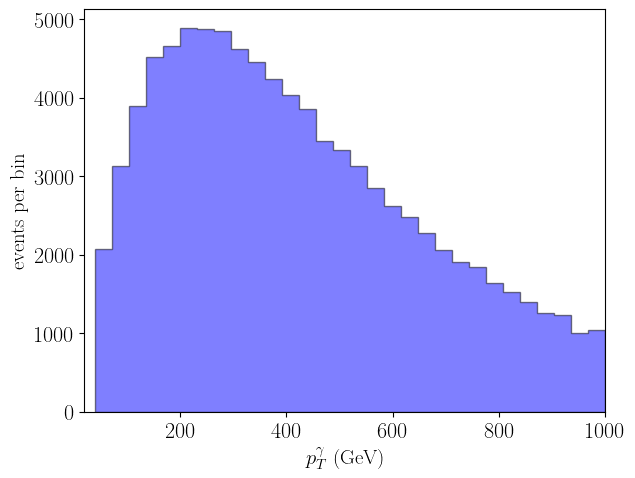

In [13]:
# histogram for NP signal (n = number of events per bin)
# density=True gives bin's raw count divided by the total number of counts and the bin width, i.e. density = counts / (sum(counts) * np.diff(bins)
n, bins, _ =plt.hist(ga.pt,bins=30,range=(40,1000),label='non-linear axion', alpha=0.5,density=False,color = "blue", ec="k",histtype='stepfilled',log=False)
plt.xlim(20, 1000)
plt.tight_layout()
#plt.title(r'$m_{\gamma \gamma}$ ',fontsize=15)
plt.xlabel(r'$p_T^{\gamma}$ (GeV)',fontsize=15)
plt.ylabel(r'events per bin',fontsize=15)
#plt.savefig("mZZ.pdf")
plt.show()

In [14]:
j1.pt;

In [15]:
j2.pt;

In [16]:
jlead_pt = np.maximum(j1.pt,j2.pt)

In [17]:
jlead_pt

<Array [154, 132, 419, 57.7, ..., 105, 765, 261, 290] type='100000 * float64'>

In [18]:
max(jlead_pt)

2626.5504919095492

In [19]:
min(jlead_pt)

30.374951279165543

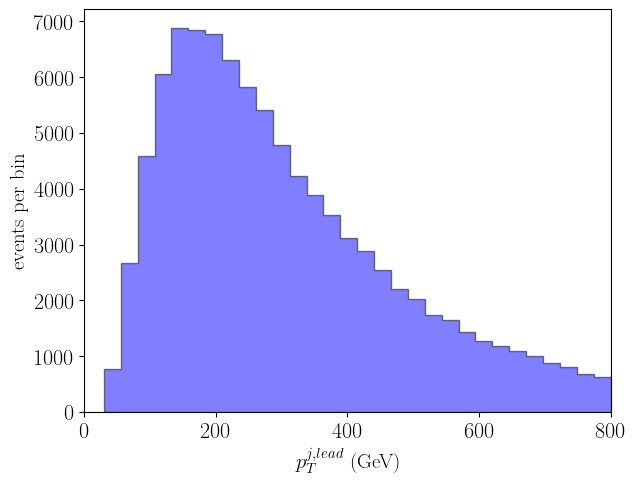

In [20]:
# histogram for NP signal (n = number of events per bin)
# density=True gives bin's raw count divided by the total number of counts and the bin width, i.e. density = counts / (sum(counts) * np.diff(bins)
n, bins, _ =plt.hist(jlead_pt,bins=30,range=(30,800),label='non-linear axion', alpha=0.5,density=False,color = "blue", ec="k",histtype='stepfilled',log=False)
plt.xlim(0, 800)
plt.tight_layout()
#plt.title(r'$m_{\gamma \gamma}$ ',fontsize=15)
plt.xlabel(r'$p_T^{j,lead}$ (GeV)',fontsize=15)
plt.ylabel(r'events per bin',fontsize=15)
plt.show()

In [21]:
acc_bins = n.sum()/Ntot

In [22]:
acc_bins

0.93729

# $p_T^{\gamma}$ distribution

## Read in data and background from Table 3a in HEPdata

In [23]:
#data (rows 10-14)
raw_data = pd.read_csv('../MadGraph/ppaxgammaZ/data_gammaZ.csv', sep=',', nrows=4, header=10).values

In [24]:
raw_data[0]

array([ 5.0e+01,  2.0e+01,  8.0e+01,  5.9e-02,  2.1e-02, -2.1e-02])

In [25]:
raw_data[-1,0]

300.0

In [26]:
mgammaZ_bin_center = raw_data[:,0]

In [27]:
mgammaZ_bin_center

array([ 50., 100., 160., 300.])

In [28]:
mgammaZ_bin_lower=raw_data[:,1]

In [29]:
mgammaZ_bin_upper=raw_data[:,2]

In [30]:
mgammaZ_bins = np.append(mgammaZ_bin_lower, mgammaZ_bin_upper[-1])

In [31]:
mgammaZ_bins

array([ 20.,  80., 120., 200., 400.])

In [32]:
data = raw_data[:,3]

In [33]:
len(data)

4

In [34]:
print(data)
# last bin 1??

[0.059   0.0264  0.0074  0.00147]


In [35]:
# total uncertainty, the uncertainty bands are symmetric
data_unc = raw_data[:,-2]

In [36]:
print(data_unc)

[0.021   0.006   0.0024  0.00068]


In [37]:
data+data_unc

array([0.08   , 0.0324 , 0.0098 , 0.00215])

In [38]:
#background, take SHERPA (rows 84-154)
raw_background = pd.read_csv('../MadGraph/ppaxgammaZ/data_gammaZ.csv', sep=',', nrows=4, header=17).values

In [39]:
raw_background[0]

array([ 5.00e+01,  2.00e+01,  8.00e+01,  5.39e-02,  8.90e-03, -8.90e-03])

In [40]:
background = raw_background[:,3]

In [41]:
print(background)

[0.0539  0.0134  0.0049  0.00114]


In [42]:
background_unc = raw_background[:,4]

In [43]:
# systematic background uncertainty
# wtf, 33??? is this true??
print(background_unc)

[0.0089  0.0024  0.001   0.00025]


<>:6: SyntaxWarning: invalid escape sequence '\g'
<>:8: SyntaxWarning: invalid escape sequence '\g'
<>:6: SyntaxWarning: invalid escape sequence '\g'
<>:8: SyntaxWarning: invalid escape sequence '\g'
/var/folders/d0/vjgg68h93_q2fcyzx7cftx_h0000gn/T/ipykernel_34382/2515729461.py:6: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel('$p_T^{\gamma}$ (GeV) ')
/var/folders/d0/vjgg68h93_q2fcyzx7cftx_h0000gn/T/ipykernel_34382/2515729461.py:8: SyntaxWarning: invalid escape sequence '\g'
  plt.title("Data and background distribution in $p_T^{\gamma}$")


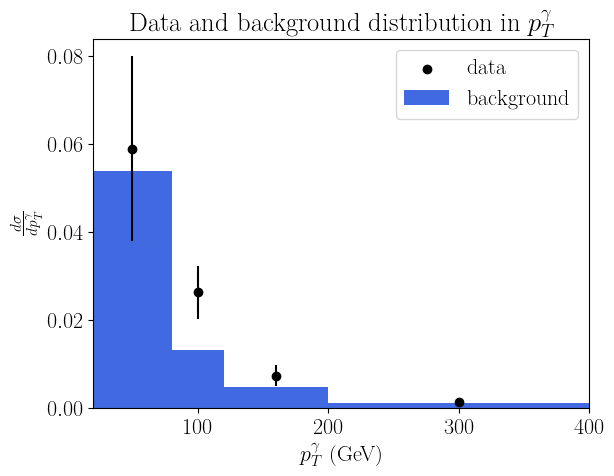

In [44]:
plt.bar(mgammaZ_bins[:-1], background, width=np.diff(mgammaZ_bins), align='edge', alpha=1, color='royalblue',label='background')
#plt.bar(mZZ_bins[:-1], background_unc, width=np.diff(mZZ_bins), align='edge', alpha=0.3, color='royalblue',label='background unc')
plt.scatter(mgammaZ_bin_center, data, color='black', label='data')
plt.xlim(20,400)
plt.errorbar(mgammaZ_bin_center, data, data_unc, color='black', alpha=1,fmt='none')
plt.xlabel('$p_T^{\gamma}$ (GeV) ')
plt.ylabel(r'$\frac{d \sigma}{d p_T^{\gamma}}$')
plt.title("Data and background distribution in $p_T^{\gamma}$")
plt.legend()

In [45]:
(data*np.diff(mgammaZ_bins)).sum()

5.482

## Histogram with signal events in the right binning

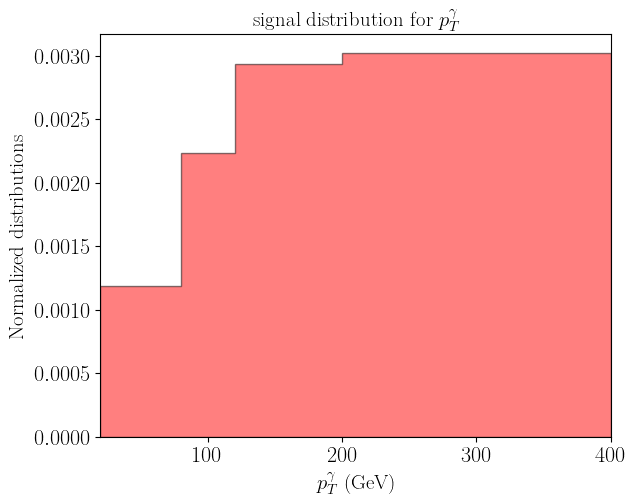

In [46]:
# histogram for NP signal (n = number of events per bin)
# density=True gives bin's raw count divided by the total number of counts and the bin width, i.e. density = counts / (sum(counts) * np.diff(bins))
n_signal, bins, _ =plt.hist(ga.pt,bins=mgammaZ_bins,range=(20,400),label='non-linear axion', alpha=0.5,density=True,color = "red", ec="k",histtype='stepfilled',log=False)
plt.xlim(20, 400)
plt.tight_layout()
plt.title(r'signal distribution for $p_T^{\gamma}$ ',fontsize=15)
plt.xlabel(r'$p_T^{\gamma}$ (GeV)',fontsize=15)
plt.ylabel(r'Normalized distributions',fontsize=15)
#plt.savefig("mHHdist.pdf")
plt.show()

In [47]:
(n_signal*np.diff(mgammaZ_bins)).sum()

1.0

ATLAS also gives the data and background in events per bin and per bin width, meaning that we do not have to multiply with the bin width to compare the signal.

## Compare signal with data and background


In [48]:
# rescale the MG5 signal events to compare with the data: N_events = n_events * L * sigma * acc
# acc = acceptence to the phase space cuts = number of events that pass the cuts / number of all events
# sigma in lhe file: total cross section including BR (unless we generate the process with decaying the Higgses or Z), sigma in pb
# cross check with more severe cuts that sigma * acc is the same

# careful! the lumi is given in fb, and so is the differential cross section. 
# So we need the cross section from MadGraph in fb as well, which explains the additional factor of 1000.
lumi = 137
acc = 0.0673  # BR of Z into leptons, assume efficiency 1
N_events = n_signal * lumi * sigma * acc

<>:6: SyntaxWarning: invalid escape sequence '\g'
<>:6: SyntaxWarning: invalid escape sequence '\g'
/var/folders/d0/vjgg68h93_q2fcyzx7cftx_h0000gn/T/ipykernel_34382/298403872.py:6: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel('$p_T^{\gamma}$ (GeV)',fontsize=15)


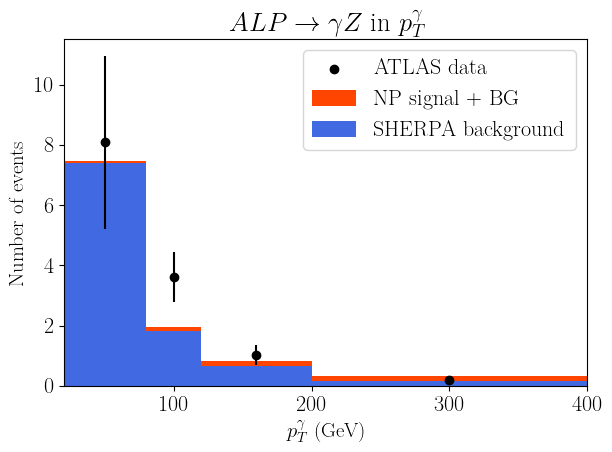

In [49]:
plt.bar(bins[:-1], background*lumi+n_signal*sigma*1000*lumi*acc, width=np.diff(bins), align='edge', alpha=1, color='orangered', label='NP signal + BG')
#plt.bar(bins[:-1], n_norm*sigma*lumi, width=np.diff(bins), align='edge', alpha=1, color='orangered', label='NP signal + BG')
plt.bar(bins[:-1], background*lumi, width=np.diff(bins), align='edge', alpha=1, color='royalblue',label='SHERPA background')
plt.xlim(20, 400)
#plt.ylim(0,10000)
plt.xlabel('$p_T^{\gamma}$ (GeV)',fontsize=15)
plt.ylabel('Number of events',fontsize=15)
plt.errorbar(mgammaZ_bin_center, data*lumi, data_unc*lumi, color='black', alpha=1,fmt='none')
plt.scatter(mgammaZ_bin_center, data*lumi, color='black', label='ATLAS data')
plt.legend()
plt.title(r"$ALP \rightarrow \gamma Z$ in $p_T^{\gamma}$")
plt.tight_layout()
#plt.savefig("/Users/esser/Documents/PROJECTS/ALPsPheno/ALP HH/ALP-HH analysis/all_params_1/mHHc=1_all1.pdf")
plt.show()

### Output data to Mathematica

In [50]:
# data
Mathematica_data = "{" + ",".join([f"{x:.4e}".replace('e', '*10^') for x in data]) + "}" + ";"
print(Mathematica_data)

{5.9000*10^-02,2.6400*10^-02,7.4000*10^-03,1.4700*10^-03};


In [51]:
# data unc
Mathematica_data_unc = "{" + ",".join([f"{x:.4e}".replace('e', '*10^') for x in data_unc]) + "}" ";"
print(Mathematica_data_unc)

{2.1000*10^-02,6.0000*10^-03,2.4000*10^-03,6.8000*10^-04};


In [52]:
# background
Mathematica_background = "{" + ",".join([f"{x:.4e}".replace('e', '*10^') for x in background]) + "}" ";"
print(Mathematica_background)

{5.3900*10^-02,1.3400*10^-02,4.9000*10^-03,1.1400*10^-03};


In [53]:
# signal
N_signal = n_signal * sigma * 1000 * acc
Mathematica_signal = "{" + ",".join([f"{x:.4e}".replace('e', '*10^') for x in N_signal]) + "}" ";"
print(Mathematica_signal)

{4.6452*10^-04,8.7301*10^-04,1.1453*10^-03,1.1788*10^-03};


In [54]:
# bin center
Mathematica_bin_center = "{" + ",".join(["{:.0f}".format(x) for x in mgammaZ_bin_center]) + "}" ";"
print(Mathematica_bin_center)

{50,100,160,300};


# $p_T^{j,lead}$ distribution

## Read in data and background from Table 3b in HEPdata

In [55]:
#data (rows 10-14)
raw_data_jl = pd.read_csv('../MadGraph/ppaxgammaZ/data_gammaZ_pT_jlead.csv', sep=';', nrows=4, header=10).values

In [56]:
raw_data_jl[0]

array([ 9.0e+01,  3.0e+01,  1.5e+02,  1.9e+01,  1.0e-02, -1.0e-02])

In [57]:
raw_data_jl[-1,0]

575.0

In [58]:
jl_bin_center = raw_data_jl[:,0]

In [59]:
jl_bin_center

array([ 90., 200., 300., 575.])

In [60]:
jl_bin_lower=raw_data_jl[:,1]

In [61]:
jl_bin_upper=raw_data_jl[:,2]

In [62]:
jl_bins = np.append(jl_bin_lower, jl_bin_upper[-1])

In [63]:
jl_bins

array([ 30., 150., 250., 350., 800.])

In [64]:
data_jl = raw_data_jl[:,3]
data_jl[0]=0.019

In [65]:
print(data_jl)

[0.019   0.0133  0.0056  0.00109]


In [66]:
# total uncertainty, the uncertainty bands are symmetric
data_unc_jl = raw_data_jl[:,-2]
data_unc_jl[1] = 0.0026

In [67]:
print(data_unc_jl)

[0.01   0.0026 0.0025 0.0036]


In [68]:
raw_background_jl = pd.read_csv('../MadGraph/ppaxgammaZ/data_gammaZ_pT_jlead.csv', sep=';', nrows=4, header=18).values

In [69]:
raw_background_jl[0]

array([ 9.00e+01,  3.00e+01,  1.50e+02,  1.76e-02,  2.80e-03, -2.80e-03])

In [70]:
background_jl = raw_background_jl[:,3]

In [71]:
print(background_jl)

[0.0176  0.0149  0.0052  0.00059]


In [72]:
background_unc_jl = raw_background_jl[:,4]
background_unc_jl[2]= 0.001

In [73]:
print(background_unc_jl)

[0.0028  0.0026  0.001   0.00014]


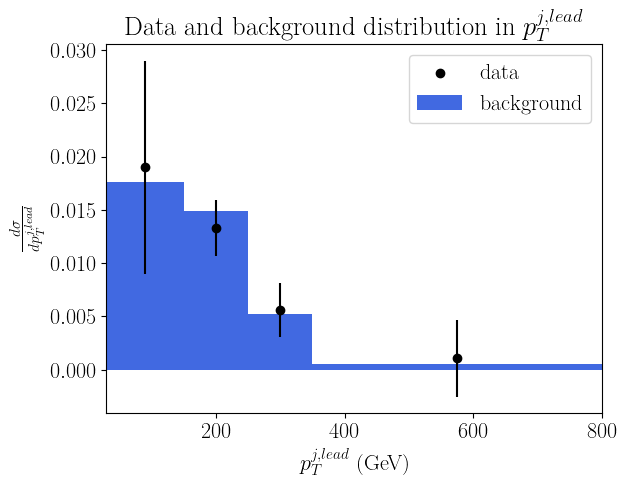

In [74]:
plt.bar(jl_bins[:-1], background_jl, width=np.diff(jl_bins), align='edge', alpha=1, color='royalblue',label='background')
#plt.bar(mZZ_bins[:-1], background_unc, width=np.diff(mZZ_bins), align='edge', alpha=0.3, color='royalblue',label='background unc')
plt.scatter(jl_bin_center, data_jl, color='black', label='data')
plt.xlim(30,800)
plt.errorbar(jl_bin_center, data_jl, data_unc_jl, color='black', alpha=1,fmt='none')
plt.xlabel('$p_T^{j,lead}$ (GeV) ')
plt.ylabel(r'$\frac{d \sigma}{d p_T^{j,lead}}$')
plt.title("Data and background distribution in $p_T^{j,lead}$")
plt.legend()

In [75]:
(data_jl*np.diff(jl_bins)).sum()

4.660499999999999

## Histogram with signal events in the right binning

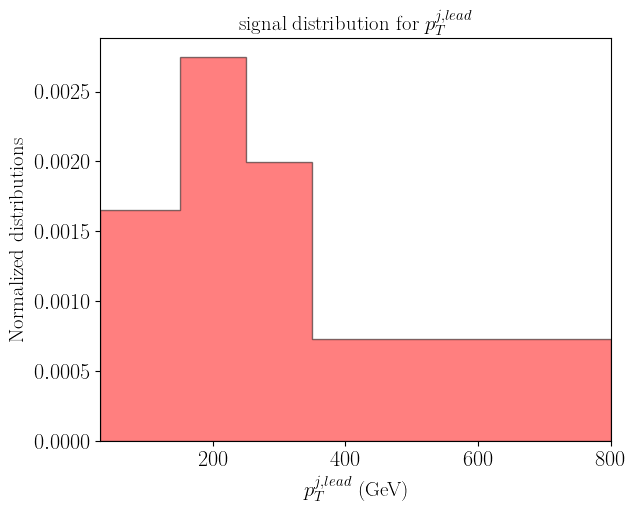

In [76]:
# histogram for NP signal (n = number of events per bin)
# density=True gives bin's raw count divided by the total number of counts and the bin width, i.e. density = counts / (sum(counts) * np.diff(bins))
n_signal_jl, bins_jl, _ =plt.hist(jlead_pt,bins=jl_bins,range=(30,800),label='non-linear axion', alpha=0.5,density=True,color = "red", ec="k",histtype='stepfilled',log=False)
plt.xlim(30, 800)
plt.tight_layout()
plt.title(r'signal distribution for $p_T^{j,lead}$ ',fontsize=15)
plt.xlabel(r'$p_T^{j,lead}$ (GeV)',fontsize=15)
plt.ylabel(r'Normalized distributions',fontsize=15)
#plt.savefig("mHHdist.pdf")
plt.show()

In [77]:
(n_signal_jl*np.diff(jl_bins)).sum()

1.0

## Compare signal with background and data

In [78]:
# careful! the lumi is given in fb, and so is the differential cross section. 
# So we need the cross section from MadGraph in fb as well, which explains the additional factor of 1000.
lumi = 137
acc = 0.0673 * acc_bins # BR of Z into leptons, assume efficiency 1
N_events_jl = n_signal_jl * lumi * sigma * acc

In [79]:
sigma

0.005797535391337517

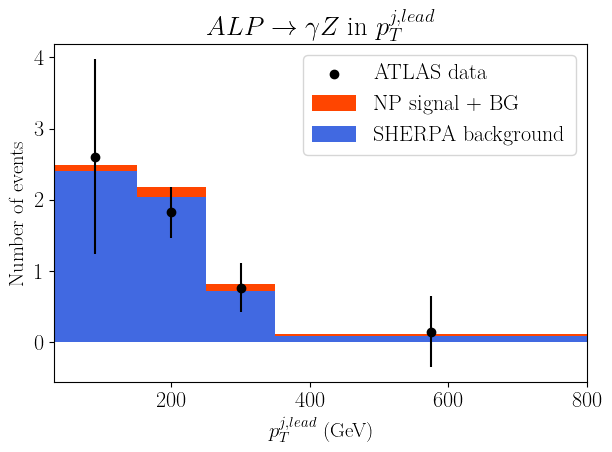

In [80]:
plt.bar(bins_jl[:-1], background_jl*lumi+n_signal_jl*sigma*1000*lumi*acc, width=np.diff(bins_jl), align='edge', alpha=1, color='orangered', label='NP signal + BG')
#plt.bar(bins[:-1], n_norm*sigma*lumi, width=np.diff(bins), align='edge', alpha=1, color='orangered', label='NP signal + BG')
plt.bar(bins_jl[:-1], background_jl*lumi, width=np.diff(bins_jl), align='edge', alpha=1, color='royalblue',label='SHERPA background')
plt.xlim(30, 800)
#plt.ylim(0,10000)
plt.xlabel('$p_T^{j,lead}$ (GeV)',fontsize=15)
plt.ylabel('Number of events',fontsize=15)
plt.errorbar(jl_bin_center, data_jl*lumi, data_unc_jl*lumi, color='black', alpha=1,fmt='none')
plt.scatter(jl_bin_center, data_jl*lumi, color='black', label='ATLAS data')
plt.legend()
plt.title(r"$ALP \rightarrow \gamma Z$ in $p_T^{j,lead}$")
plt.tight_layout()
#plt.savefig("/Users/esser/Documents/PROJECTS/ALPsPheno/ALP GLOBAL/Figures/gammaZ.pdf")
plt.show()

### Output data to Mathematica

In [81]:
# data
Mathematica_data_jl = "{" + ",".join([f"{x:.4e}".replace('e', '*10^') for x in data_jl]) + "}" + ";"
print(Mathematica_data_jl)

{1.9000*10^-02,1.3300*10^-02,5.6000*10^-03,1.0900*10^-03};


In [82]:
# data unc
Mathematica_data_unc_jl = "{" + ",".join([f"{x:.4e}".replace('e', '*10^') for x in data_unc_jl]) + "}" ";"
print(Mathematica_data_unc_jl)

{1.0000*10^-02,2.6000*10^-03,2.5000*10^-03,3.6000*10^-03};


In [83]:
# background
Mathematica_background_jl = "{" + ",".join([f"{x:.4e}".replace('e', '*10^') for x in background_jl]) + "}" ";"
print(Mathematica_background_jl)

{1.7600*10^-02,1.4900*10^-02,5.2000*10^-03,5.9000*10^-04};


In [84]:
# signal
N_signal_jl = n_signal_jl * sigma * 1000
Mathematica_signal_jl = "{" + ",".join([f"{x:.4e}".replace('e', '*10^') for x in N_signal_jl]) + "}" ";"
print(Mathematica_signal_jl)

{9.5962*10^-03,1.5910*10^-02,1.1561*10^-02,4.2197*10^-03};


In [85]:
# bin center
Mathematica_bin_center_jl = "{" + ",".join(["{:.0f}".format(x) for x in jl_bin_center]) + "}" ";"
print(Mathematica_bin_center_jl)

{90,200,300,575};
